In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy import stats
import scipy as sp
import statsmodels.formula.api as smf
import statsmodels.api as sm
plt.rc('figure', figsize = (12,12))

In [3]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:

df.insert(9,'Position_Class',
            df.apply(lambda x: 
            'Forward' if x['Position'] in ['LS','ST','RS','LW','LF','CF','RF','RW']
            else 'Midfielder' if x['Position'] in ['LAM','CAM','RAM','LM','LCM','CM','RCM','RM']
            else 'Defender' if x['Position'] in  ['LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB']
            else 'GoalKeeper', axis =1))

In [5]:
df.drop(['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB'], axis=1, inplace=True)

In [6]:
def cut(Value):
    out = Value.replace('€','')
    if 'M' in out:
        out = float(out.replace('M',''))*1000000
    elif 'K' in out:
        out = float(out.replace('K',''))*1000
    return float(out)
df['Wage'] = df.Wage.apply(cut)
df['Value'] =df.Value.apply(cut)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 64 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Position_Class            18207 non-null  object 
 10  Club                      17966 non-null  object 
 11  Club Logo                 18207 non-null  object 
 12  Value                     18207 non-null  float64
 13  Wage                      18207 non-null  float64
 14  Specia

In [8]:
df.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 64, dtype: int64

In [9]:
# 팀원과 상의후 처리할데이터 분할
data = df[['Position_Class','ShortPassing','Volleys','Dribbling','Curve',
           'FKAccuracy','LongPassing','BallControl','Acceleration',
           'SprintSpeed','Agility','Reactions','Balance' ,'ShotPower',
           'Jumping','Stamina','Strength','Wage','Value']]                  

In [24]:
data

,Position_Class,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,Wage,Value
0,Forward,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,565000.0,110500000.0
1,Forward,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,405000.0,77000000.0
2,Forward,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,290000.0,118500000.0
3,GoalKeeper,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,260000.0,72000000.0
4,Midfielder,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,355000.0,102000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,Midfielder,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,1000.0,60000.0
18203,Forward,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,1000.0,60000.0
18204,Forward,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,1000.0,60000.0
18205,Forward,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,1000.0,60000.0


In [10]:
# Wage 데이터 float으로 타입변환
def cut(Value):
    out = Value.replace('€','')
    if 'M' in out:
        out = float(out.replace('M',''))*1000000
    elif 'K' in out:
        out = float(out.replace('K',''))*1000
    return float(out)
data['Wage'] = df.Wage.apply(cut)
data['Value'] =df.Value.apply(cut)

AttributeError: 'float' object has no attribute 'replace'

In [11]:
# nan 확인
data.isnull().sum()

Position_Class     0
ShortPassing      48
Volleys           48
Dribbling         48
Curve             48
FKAccuracy        48
LongPassing       48
BallControl       48
Acceleration      48
SprintSpeed       48
Agility           48
Reactions         48
Balance           48
ShotPower         48
Jumping           48
Stamina           48
Strength          48
Wage               0
Value              0
dtype: int64

In [12]:
# nan값 제거
data.drop(data[data['ShortPassing'] != data.ShortPassing].index,inplace =True)


C:\Users\admin\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


 히트맵 함수를 통해 각 능력치들과 Wage간의 상관관계를 분석
 
 능력치들 사이의 상관관계가 다양하며 큰 상관관계를 보여주는 부분도 많다
 
 하지만 능력치와 Wage간의 상관관계는 높지 않았으며 그나마 'Reactions'이 0.5의 상관관계를 보여줌
 
 Reactions는 반응속도로 Passing 능력치들과 그나마 연관성을 보인다.
 
 Jumping, Strength는 다른 능력치들과의 연관성도 미미하다
 
 Strength 와 Balance는 음의 상관관계가 존재.
 
 

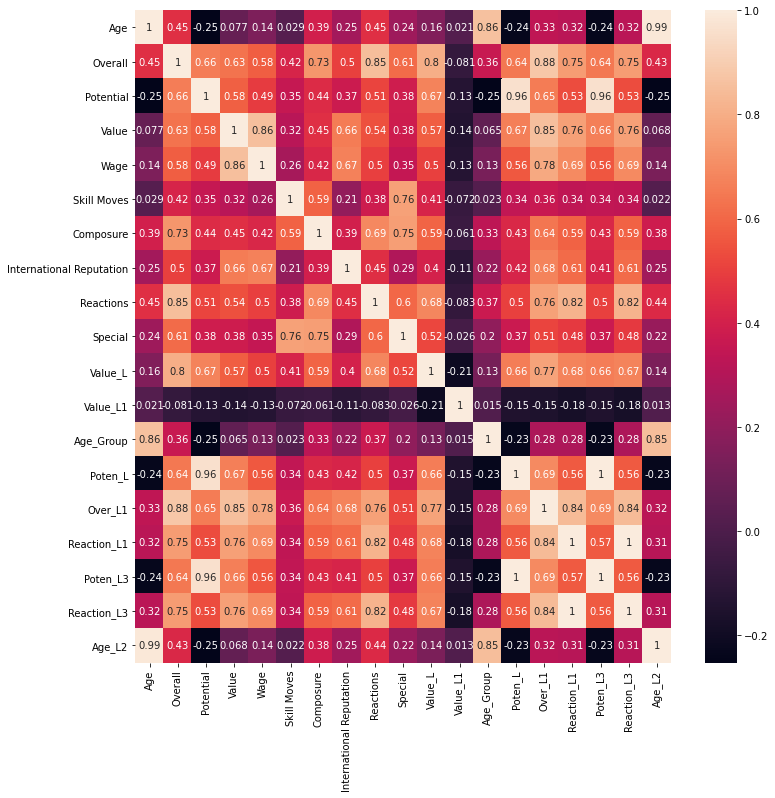

In [474]:
fig = plt.figure(figsize=(12,12))
sns.heatmap(fdf.corr(),annot=True)


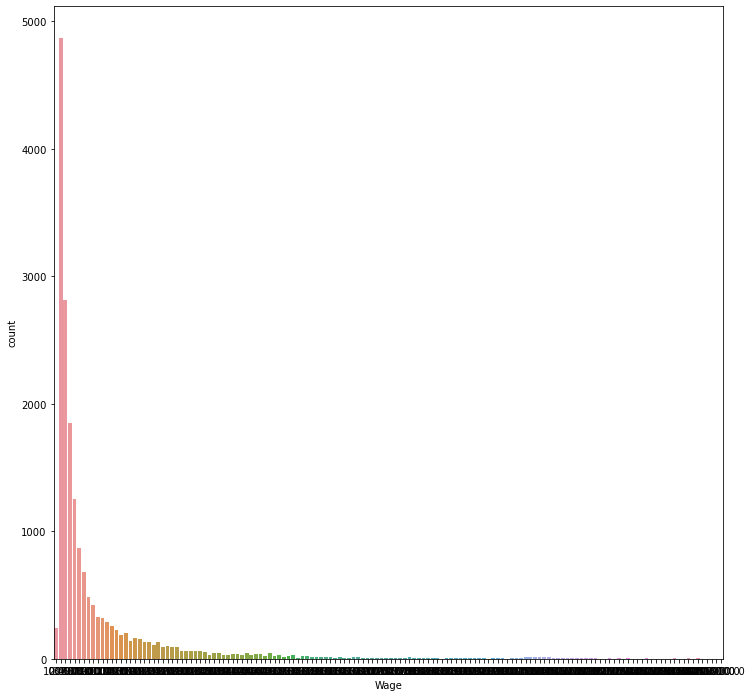

In [96]:
# 
fig = plt.figure(figsize=(12,12))
sns.countplot('Wage',data=data)

In [246]:
fig = plt.figure(figsize=(12,12))
sns.lmplot(x='Contract Valid Until',y ='Wage' ,data = data)

KeyError: "['Contract Valid Until'] not in index"

<Figure size 864x864 with 0 Axes>

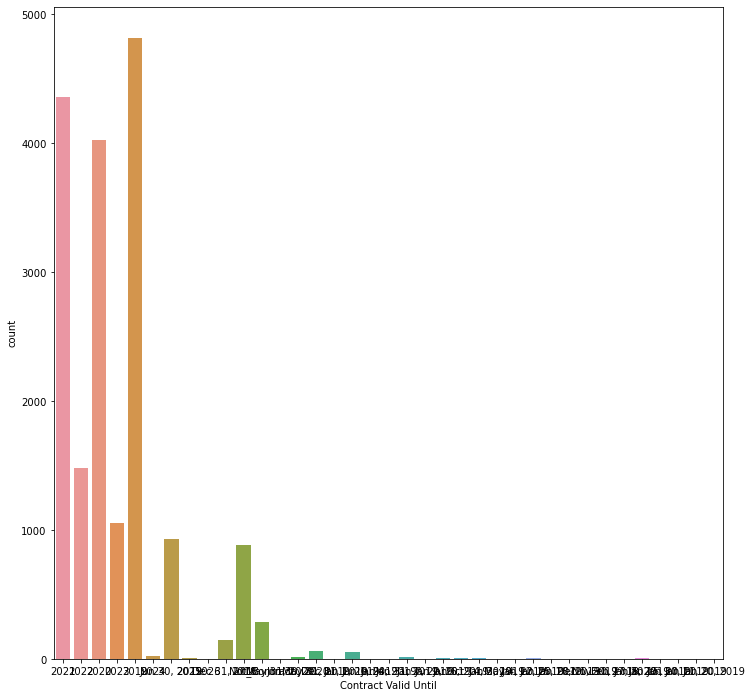

In [28]:
fig = plt.figure(figsize=(12,12))
sns.countplot(x='Contract Valid Until' ,data = df)

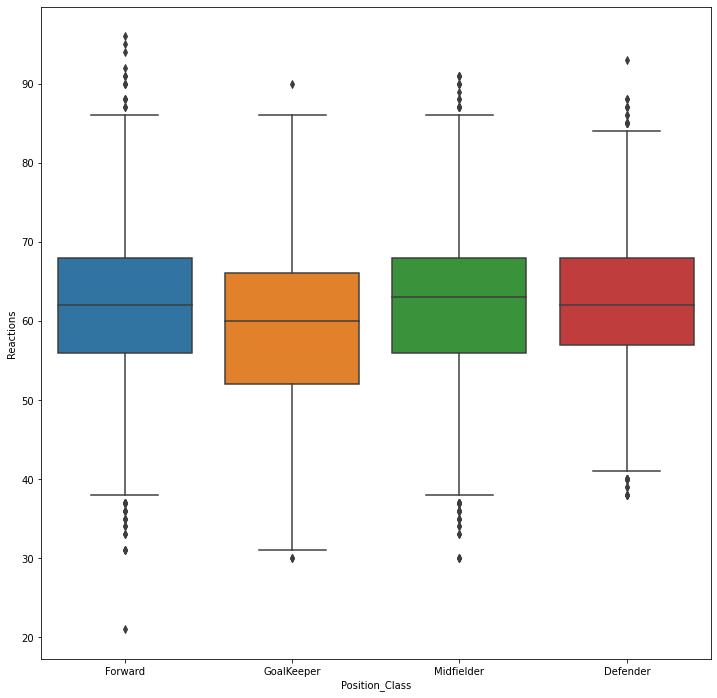

In [135]:
sns.boxplot(x ="Position_Class", y = 'Reactions',data = data )

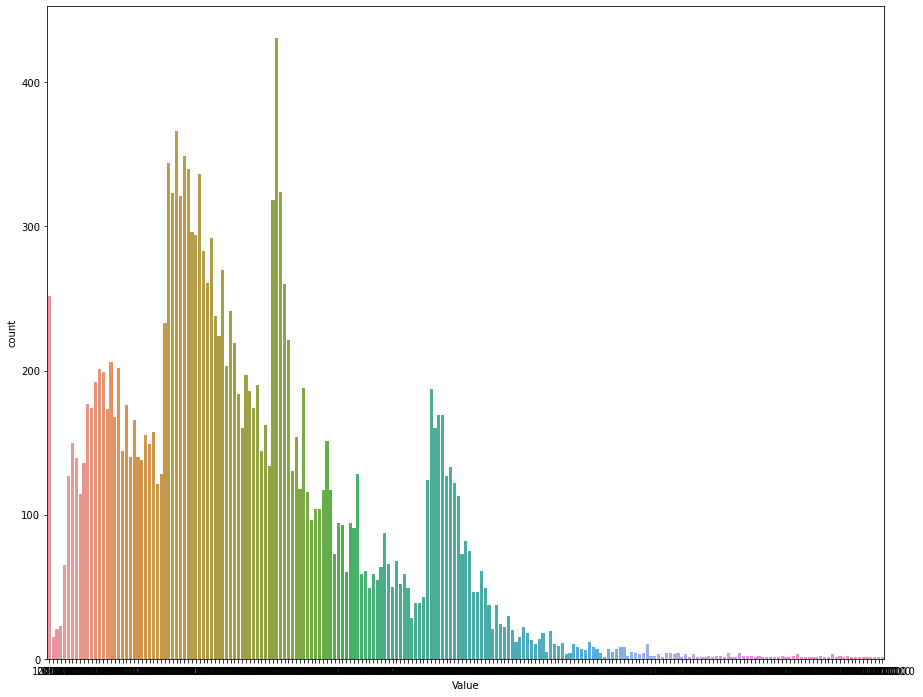

In [63]:
g = plt.figure(figsize=(15,12))
sns.countplot('Value',data=data )

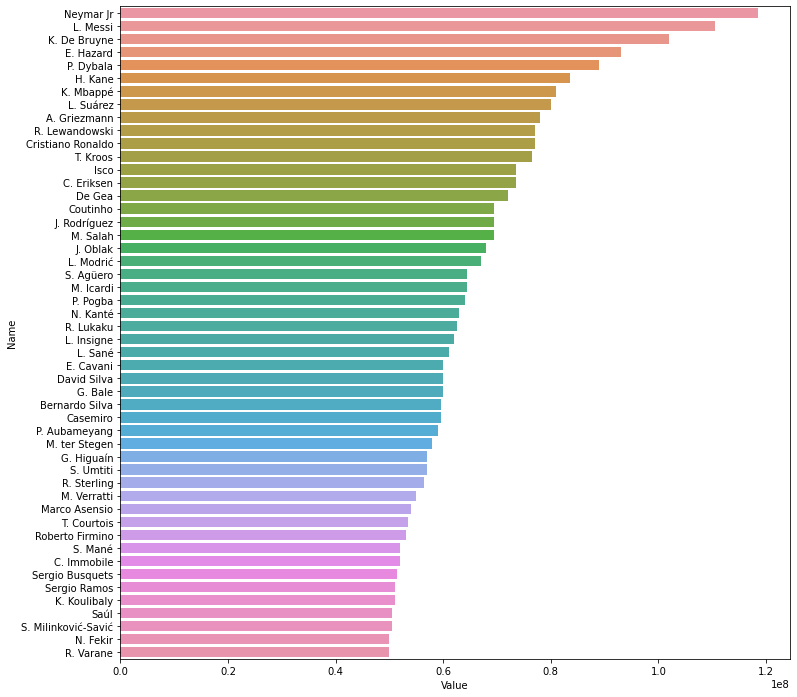

In [62]:
ply = df.sort_values('Value', ascending =False)[['Name','Age','Wage','Overall','Value']]
# ply.head(20)
sns.barplot(x ="Value", y = 'Name',data = ply.head(50) )

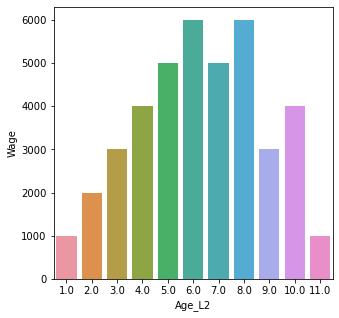

In [404]:
Rval = fdf.groupby('Age_L2')['Wage'].median().reset_index().sort_values('Wage',ascending = True)
Rval.round(2)
plt.figure(figsize=(5,5))
sns.barplot(x='Age_L2',y="Wage",data = Rval)
fdf['Age_L2'] = fdf['Age_L2'].astype('float')

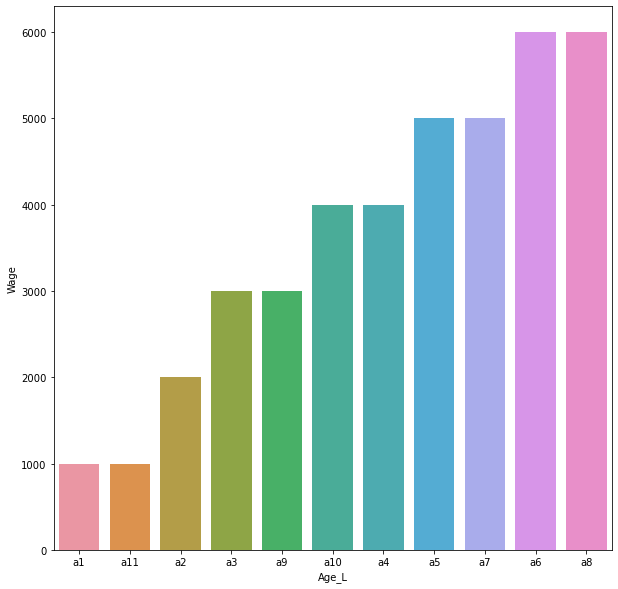

In [403]:
val = fdf.groupby('Age_L')['Wage'].median().reset_index().sort_values('Wage',ascending = True)
val.round(2)
plt.figure(figsize=(10,10))
sns.barplot(x='Age_L',y="Wage",data = val)

In [387]:
def Age_L(x):
    if x < 20 : return 'a1'
    elif (20<= x <=22) : return 'a2'
    elif (23<= x <=24) : return 'a3'
    elif (25<= x <=26) : return 'a4'
    elif (27<= x <=29) : return 'a5'
    elif (30<= x <=31) : return 'a6'
    elif (32<= x <=33) : return 'a7'
    elif (34 == x) : return 'a8'
    elif (35<= x <=38) : return 'a9'
    elif (39 == x) : return 'a10'
    elif (40<= x <=44) : return 'a11'
    
fdf['Age_L'] = fdf.Age.apply(Age_L)


In [399]:
def Age_L2(x):
    if x < 20 : return '1'
    elif (20<= x <=22) : return '2'
    elif (23<= x <=24) : return '3'
    elif (25<= x <=26) : return '4'
    elif (27<= x <=29) : return '5'
    elif (30<= x <=31) : return '6'
    elif (32<= x <=33) : return '7'
    elif (34 == x) : return '8'
    elif (35<= x <=38) : return '9'
    elif (39 == x) : return '10'
    elif (40<= x <=44) : return '11'
    
fdf['Age_L2'] = fdf.Age.apply(Age_L2)


,Age,Overall,Potential,Value,Wage,Skill Moves,Composure,International Reputation,Reactions,Special,...,Over_L1,Reaction_L,Reaction_L1,Poten_L2,Over_L2,Over_L3,Poten_L3,Reaction_L2,Reaction_L3,Age_L2


In [132]:
model = smf.ols('Wage~Reactions', data = data ).fit()
model.summary()
sm.stats.anova_lm(model , type = 2).round(2)

,df,sum_sq,mean_sq,F,PR(>F)
Reactions,1.0,2.163056e+12,2.163056e+12,5910.47,0.0
Residual,18157.0,6.644920e+12,3.659701e+08,NaN,NaN


In [32]:
df['Contract Valid Until'].plot(kind = 'hist')

TypeError: no numeric data to plot

In [17]:
df['Contract Valid Until'].unique()


array(['2021', '2022', '2020', '2023', '2019', '2024', 'Jun 30, 2019',
       '2025', '2026', 'Dec 31, 2018', '2018', 'Not_Contract',
       'May 31, 2020', 'Jun 30, 2020', 'May 31, 2019', 'Dec 31, 2019',
       'Jan 1, 2019', 'Jun 1, 2019', 'Jan 4, 2019', 'Jan 31, 2019',
       'Jan 7, 2019', 'Jan 2, 2019', 'Jan 6, 2019', 'Oct 14, 2019',
       'Jan 3, 2019', 'May 4, 2019', 'Jan 12, 2019', 'Jan 25, 2019',
       'Jan 18, 2019', 'Dec 1, 2019', 'Nov 30, 2018', 'Feb 27, 2020',
       'Jan 5, 2019', 'Jan 15, 2019', 'Jan 30, 2019', 'Jan 11, 2019',
       'Jan 20, 2019'], dtype=object)

In [14]:
a = df['Contract Valid Until'] != df['Contract Valid Until'] 
df['Contract Valid Until'][a] = 'Not_Contract'

<ipython-input-14-027d159bfac2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Contract Valid Until'][a] = 'Not_Contract'


In [16]:
a = df['Contract Valid Until'] == 'Not_Contract' 
df[a]

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Position_Class,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
452,452,207439,L. Paredes,24,https://cdn.sofifa.org/players/4/19/207439.png,Argentina,https://cdn.sofifa.org/flags/52.png,80,85,Midfielder,...,74.0,73.0,75.0,72.0,9.0,14.0,6.0,9.0,10.0,NaN
538,538,156713,A. Granqvist,33,https://cdn.sofifa.org/players/4/19/156713.png,Sweden,https://cdn.sofifa.org/flags/46.png,80,80,Defender,...,78.0,82.0,83.0,79.0,7.0,9.0,12.0,10.0,15.0,NaN
568,568,229909,A. Lunev,26,https://cdn.sofifa.org/players/4/19/229909.png,Russia,https://cdn.sofifa.org/flags/40.png,79,81,GoalKeeper,...,69.0,18.0,20.0,12.0,80.0,73.0,65.0,77.0,85.0,NaN
677,677,187347,I. Smolnikov,29,https://cdn.sofifa.org/players/4/19/187347.png,Russia,https://cdn.sofifa.org/flags/40.png,79,79,Defender,...,73.0,76.0,76.0,80.0,7.0,12.0,10.0,8.0,15.0,NaN
874,874,187607,A. Dzyuba,29,https://cdn.sofifa.org/players/4/19/187607.png,Russia,https://cdn.sofifa.org/flags/40.png,78,78,Forward,...,70.0,21.0,15.0,19.0,15.0,12.0,11.0,11.0,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17197,17197,245164,V. Kaith,21,https://cdn.sofifa.org/players/4/19/245164.png,India,https://cdn.sofifa.org/flags/159.png,55,64,GoalKeeper,...,29.0,8.0,12.0,11.0,55.0,50.0,57.0,59.0,53.0,NaN
17215,17215,243131,K. Taimi,26,https://cdn.sofifa.org/players/4/19/243131.png,Finland,https://cdn.sofifa.org/flags/17.png,55,57,Defender,...,36.0,51.0,58.0,64.0,11.0,9.0,9.0,12.0,12.0,NaN
17339,17339,233526,S. Passi,23,https://cdn.sofifa.org/players/4/19/233526.png,India,https://cdn.sofifa.org/flags/159.png,54,63,GoalKeeper,...,45.0,14.0,23.0,21.0,8.0,6.0,13.0,9.0,10.0,NaN
17436,17436,236452,D. Lalhlimpuia,20,https://cdn.sofifa.org/players/4/19/236452.png,India,https://cdn.sofifa.org/flags/159.png,54,67,GoalKeeper,...,46.0,26.0,17.0,13.0,7.0,8.0,12.0,11.0,11.0,NaN


In [113]:
fdf.corr()

,Age,Overall,Potential,Value,Wage,Skill Moves,Composure,International Reputation,Reactions,Special,Value_L
Age,1.000000,0.453252,-0.252799,0.077274,0.143944,0.028737,0.393253,0.254064,0.453785,0.238560,-0.170553
Overall,0.453252,1.000000,0.660850,0.631395,0.575940,0.415865,0.730109,0.501142,0.851144,0.608863,-0.869858
Potential,-0.252799,0.660850,1.000000,0.579482,0.488999,0.354908,0.440228,0.374155,0.513877,0.384714,-0.720591
Value,0.077274,0.631395,0.579482,1.000000,0.858030,0.317204,0.454276,0.655187,0.544791,0.380310,-0.482320
Wage,0.143944,0.575940,0.488999,0.858030,1.000000,0.264344,0.423256,0.670736,0.499564,0.350178,-0.432723
Skill Moves,0.028737,0.415865,0.354908,0.317204,0.264344,1.000000,0.587385,0.208307,0.378647,0.763206,-0.471307
Composure,0.393253,0.730109,0.440228,0.454276,0.423256,0.587385,1.000000,0.394793,0.688173,0.753364,-0.645284
International Reputation,0.254064,0.501142,0.374155,0.655187,0.670736,0.208307,0.394793,1.000000,0.447417,0.292718,-0.330269
Reactions,0.453785,0.851144,0.513877,0.544791,0.499564,0.378647,0.688173,0.447417,1.000000,0.598932,-0.727493
Special,0.238560,0.608863,0.384714,0.380310,0.350178,0.763206,0.753364,0.292718,0.598932,1.000000,-0.581879


In [75]:
df1 = pd.read_csv('df.csv')
df1

,Unnamed: 0,ID,Name,Age,Nationality,Overall,Potential,Club,Position_Class,Value,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,Forward,€110.5M,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Forward,€77M,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Forward,€118.5M,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,3,193080,De Gea,27,Spain,91,93,Manchester United,GoalKeeper,€72M,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,Midfielder,€102M,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17913,18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,Midfielder,€60K,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143000.0
17914,18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,Forward,€60K,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113000.0
17915,18204,241638,B. Worman,16,England,47,67,Cambridge United,Forward,€60K,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165000.0
17916,18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,Forward,€60K,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,143000.0


In [76]:
df1['Loaned From'].fillna(0, inplace=True)
df1.insert(9,'isLoand',
            df.apply(lambda x: 
            0 if x['Loaned From']==0
            else 1, axis =1))
df1

,Unnamed: 0,ID,Name,Age,Nationality,Overall,Potential,Club,Position_Class,isLoand,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,Forward,1,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Forward,1,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Forward,1,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,3,193080,De Gea,27,Spain,91,93,Manchester United,GoalKeeper,1,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,Midfielder,1,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17913,18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,Midfielder,1,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143000.0
17914,18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,Forward,1,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113000.0
17915,18204,241638,B. Worman,16,England,47,67,Cambridge United,Forward,1,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165000.0
17916,18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,Forward,1,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,143000.0


In [77]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import re

In [78]:
def extract_v(v):
    out = v.replace('€','')
    if 'M' in out:
        out = float(out.replace('M',''))*1000000
    elif 'K' in out:
        out = float(out.replace('K',''))*1000
    return float(out)
df1.Value = df1.Value.apply(lambda x: extract_v(x))

In [79]:
# df1.drop(['Unnamed: 0','Body Type', 'Real Face', 'Joined','Contract Valid Until'],axis=1, inplace=True)

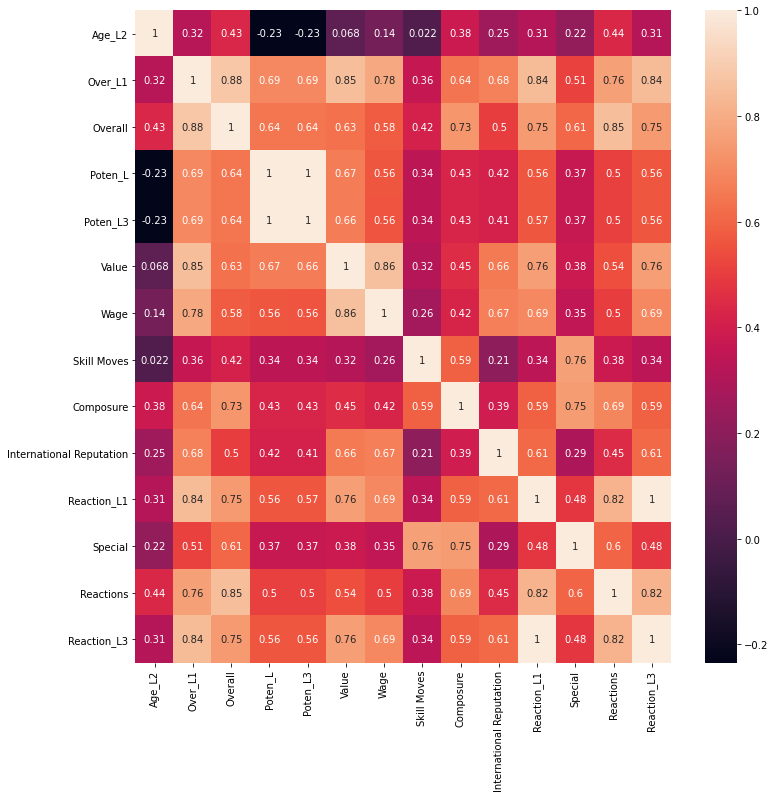

In [462]:
#0.781773
df=fdf[['Age_L2','Over_L1','Overall','Poten_L','Poten_L3','Value','Wage','Skill Moves',\
        'Composure','International Reputation','Reaction_L1','Special','Reactions','Poten_L2','Reaction_L3']]
sns.heatmap(df.corr(),annot = True)

In [463]:
df1=fdf[['Age_L','Overall','Potential','Value','Wage','Skill Moves',\
        'Composure','International Reputation','Reactions','Special']]

In [197]:
df2=fdf[['Age_L','Overall','Potential','Value','Wage','Skill Moves',\
        'Composure','International Reputation','Reactions']]

In [398]:
fdf['Age_L2']  = fdf['Age_L2'].astype(int)
C_Wage = fdf.groupby('Age_L2')['Wage'].median().reset_index().sort_values('Wage',ascending = True)
C_Wage.round(2)
plt.figure(figsize=(10,10))
sns.barplot(x='Age_L2',y="Wage",data = C_Wage)


TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

In [332]:
def Poten_L2 (x) :
    if 48<= x <= 63 : return 'p1'
    elif 64<= x <= 68 : return 'p2'
    elif 69<= x <= 72 : return 'p3'
    elif 73<= x <= 76 : return 'p4'
    elif 77<= x <= 79 : return 'p5'
    elif 80<= x <= 84 : return 'p6'
    elif 85<= x <= 86 : return 'p7'
    elif 87 == x  : return 'p8'
    elif 88 == x  : return 'p9'
    elif (89 == x): return 'p10'
    elif 90 == x  : return 'p11'
    elif 91 == x  : return 'p12'
    elif 92 == x  : return 'p13'
    elif 93 == x  : return 'p14'
    elif 94 == x  : return 'p15'
    elif 95 == x  : return 'p16'
fdf['Poten_L2'] = fdf.Potential.apply(Poten_L2).sort_values()

In [346]:
def Poten_L3 (x) :
    if 48<= x <= 63 : return '1'
    elif 64<= x <= 68 : return '2'
    elif 69<= x <= 72 : return '3'
    elif 73<= x <= 76 : return '4'
    elif 77<= x <= 79 : return '5'
    elif 80<= x <= 84 : return '6'
    elif 85<= x <= 86 : return '7'
    elif 87 == x  : return '8'
    elif 88 == x  : return '9'
    elif (89 == x): return '10'
    elif 90 == x  : return '11'
    elif 91 == x  : return '12'
    elif 92 == x  : return '13'
    elif 93 == x  : return '14'
    elif 94 == x  : return '15'
    elif 95 == x  : return '16'
fdf['Poten_L3'] = fdf.Potential.apply(Poten_L3).sort_values()
fdf['Poten_L3'] = fdf['Poten_L3'].astype('int')

In [334]:
fdf['Poten_L2']

0        p15
1        p15
2        p14
3        p14
4        p13
        ... 
17913     p2
17914     p1
17915     p2
17916     p2
17917     p2
Name: Poten_L2, Length: 17918, dtype: object

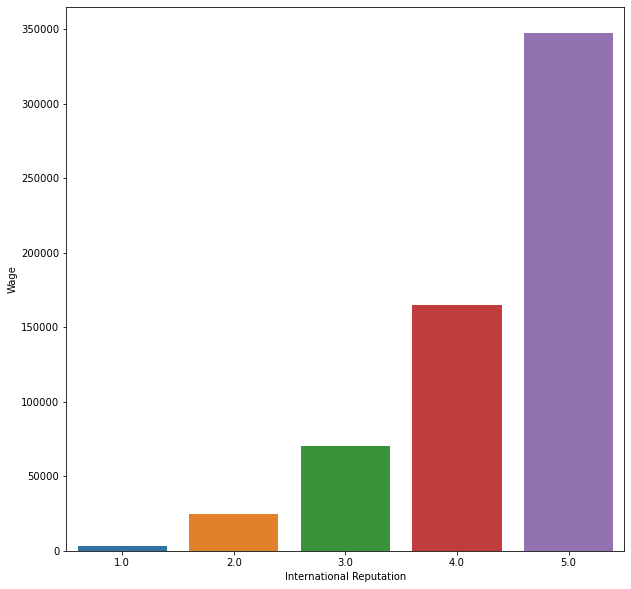

In [422]:
C_Wage = fdf.groupby('International Reputation')['Wage'].median().reset_index().sort_values('Wage',ascending = True)
C_Wage.round(2)
plt.figure(figsize=(10,10))
sns.barplot(x='International Reputation',y="Wage",data = C_Wage)

In [339]:
# Overall 구분
def Over_L2 (x) :
    if 46<= x <= 62 : return 'o1'
    elif 63<= x <= 68 : return 'o2'
    elif 69<= x <= 72 : return 'o3'
    elif 73<= x <= 75 : return 'o4'
    elif 76<= x <= 78 : return 'o5'
    elif 79<= x <= 80 : return 'o6'
    elif 81<= x <= 82 : return 'o7'
    elif 83 == x  : return 'o8'
    elif 84 == x  : return 'o9'
    elif 85 == x  : return 'o10'
    elif 86 == x  : return 'o11'
    elif 87 == x  : return 'o12'
    elif 88 == x  : return 'o13'
    elif 89 == x  : return 'o14'
    elif 90 == x  : return 'o15'
    elif 91 == x  : return 'o16'
    elif 92 == x  : return 'o17'
    elif 94 == x  : return 'o18'
    
fdf['Over_L2'] = fdf.Overall.apply(Over_L2)

In [354]:
def Over_L3 (x) :
    if 46<= x <= 62 : return '1'
    elif 63<= x <= 68 : return '2'
    elif 69<= x <= 72 : return '3'
    elif 73<= x <= 75 : return '4'
    elif 76<= x <= 78 : return '5'
    elif 79<= x <= 80 : return '6'
    elif 81<= x <= 82 : return '7'
    elif 83 == x  : return '8'
    elif 84 == x  : return '9'
    elif 85 == x  : return '10'
    elif 86 == x  : return '11'
    elif 87 == x  : return '12'
    elif 88 == x  : return '13'
    elif 89 == x  : return '14'
    elif 90 == x  : return '15'
    elif 91 == x  : return '16'
    elif 92 == x  : return '17'
    elif 94 == x  : return '18'
    
fdf['Over_L3'] = fdf.Overall.apply(Over_L3)
fdf['Over_L3'].isnull().sum()

0

In [283]:
# Overall 라벨 인코딩?(랭크화)
def Over_L (x) :
    if 46<= x <= 62 : return '1'
    elif 63<= x <= 68 : return '2'
    elif 69<= x <= 72 : return '3'
    elif 73<= x <= 75 : return '4'
    elif 76<= x <= 78 : return '5'
    elif 79<= x <= 80 : return '6'
    elif 81<= x <= 82 : return '7'
    elif 83 == x  : return '8'
    elif 84 == x  : return '9'
    elif 85 == x  : return '10'
    elif 86 == x  : return '11'
    elif 87 == x  : return '12'
    elif 90 == x  : return '13'
    elif 89 == x  : return '14'
    elif 88 == x  : return '15'
    elif 92 == x  : return '16'
    elif 91 == x  : return '17'
    elif 94 == x  : return '18'
    
fdf['Over_L1'] = fdf.Overall.apply(Over_L).sort_values()

In [284]:
fdf['Over_L1'] = fdf['Over_L1'].astype(int)

In [471]:
df=fdf[['Age','Overall','Potential','Value','Wage','Skill Moves',\
        'Composure','International Reputation','Reactions','Special']]

In [472]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y_target = df['Wage']
X_data = df.drop('Wage', axis=1)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.6f}'.format(r2_score(y_test, y_preds)))
#0.781799

MSE : 128024997.880 , RMSE : 11314.813
Variance score : 0.781669


In [282]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17918 entries, 0 to 17917
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       17918 non-null  int64  
 1   Overall                   17918 non-null  int64  
 2   Potential                 17918 non-null  int64  
 3   Value                     17918 non-null  float64
 4   Wage                      17918 non-null  float64
 5   Skill Moves               17918 non-null  float64
 6   Composure                 17918 non-null  float64
 7   International Reputation  17918 non-null  float64
 8   Reactions                 17918 non-null  float64
 9   Special                   17918 non-null  int64  
 10  Value_C                   17918 non-null  object 
 11  Value_L                   17918 non-null  float64
 12  Value_L1                  17918 non-null  float64
 13  Age_Group                 17918 non-null  float64
 14  Age_L 

In [99]:
# Value 카테고리화 : Value_C
def Value(x):
    if x <= 325000 : return 'V_Ama'
    elif 325000< x <= 700000 : return 'V_Pro'
    elif 700000 < x <=2100000: return 'V_World'
    else : return 'V_Legend'

fdf['Value_C'] = fdf.Value.apply(Value)



fdf.Value_C

0        110500000.0
1         77000000.0
2        118500000.0
3         72000000.0
4        102000000.0
            ...     
17913        60000.0
17914        60000.0
17915        60000.0
17916        60000.0
17917        60000.0
Name: Value, Length: 17918, dtype: float64

In [117]:
# Value_C 라벨인코딩
def Value_C(x):
    if x == 'V_Ama' : return float(1)
    elif x == 'V_Pro' : return float(2)
    elif x == 'V_World' : return float(3)
    else : return float(10)
    
fdf['Value_L'] = fdf.Value_C.apply(Value_C)

In [127]:
def Value_L1(x):
    if x == 'V_Ama' : return float(182403.9)
    elif x == 'V_Pro' : return float(8129883.7)
    elif x == 'V_World' : return float(510384.4)
    else : return float(1148213.9)
    
fdf['Value_L1'] = fdf.Value_C.apply(Value_L1)

In [126]:
df3 =fdf.groupby('Value_C')['Value']
df3.describe().round(1)

,count,mean,std,min,25%,50%,75%,max
Value_C,,,,,,,,
V_Ama,4684.0,182403.9,83599.3,0.0,120000.0,180000.0,250000.0,325000.0
V_Legend,4387.0,8129883.7,9281975.0,2200000.0,3200000.0,5500000.0,9000000.0,118500000.0
V_Pro,4396.0,510384.4,105775.7,350000.0,425000.0,500000.0,600000.0,700000.0
V_World,4451.0,1148213.9,374435.0,725000.0,850000.0,1000000.0,1400000.0,2100000.0


In [109]:
sns.distplot('Value_L',data=fdf )

TypeError: distplot() got an unexpected keyword argument 'data'

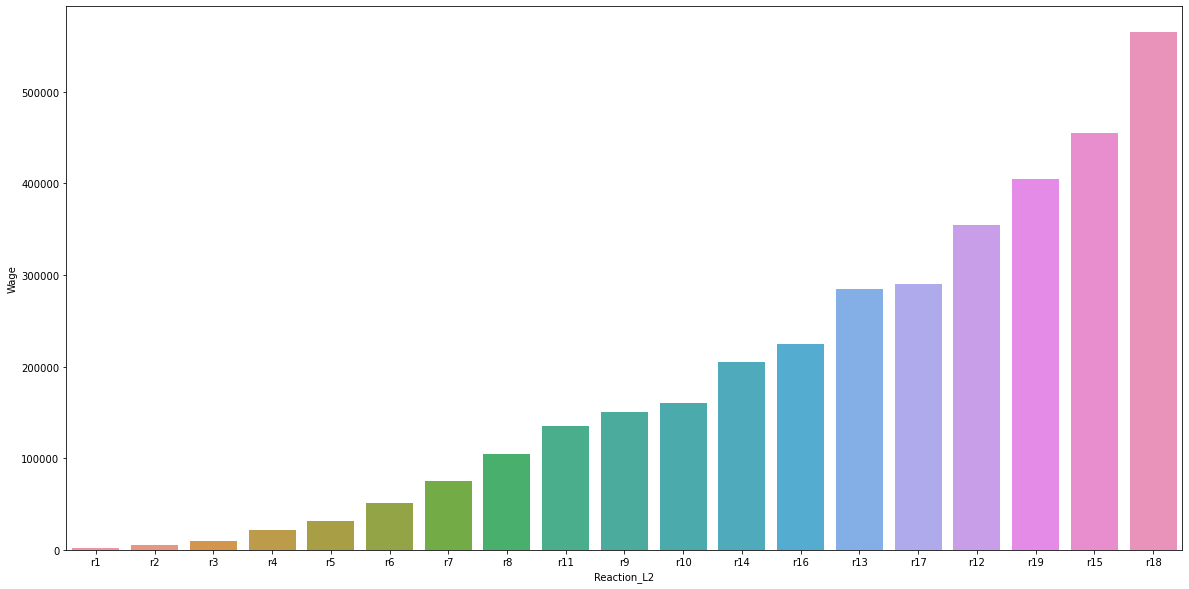

In [406]:
C_Wage = fdf.groupby('Reaction_L2')['Wage'].median().reset_index().sort_values('Wage',ascending = True)
C_Wage.round(2)
plt.figure(figsize=(20,10))
sns.barplot(x='Reaction_L2',y="Wage",data = C_Wage)

In [405]:
def Reaction_L2 (x) :
    if 21<= x <= 63 : return 'r1'
    elif 64<= x <= 67 : return 'r2'
    elif 68<= x <= 73 : return 'r3'
    elif 74<= x <= 77 : return 'r4'
    elif 78<= x <= 79 : return 'r5'
    elif 80<= x <= 82 : return 'r6'
    elif 83<= x <= 84 : return 'r7'
    elif 85 == x  : return 'r8'
    elif 86 == x  : return 'r9'
    elif 87 == x  : return 'r10'
    elif 88 == x  : return 'r11'
    elif 89 == x  : return 'r12'
    elif 90 == x  : return 'r13'
    elif 91 == x  : return 'r14'
    elif 92 == x  : return 'r15'
    elif 93 == x  : return 'r16'
    elif 94 == x  : return 'r17'
    elif 95 == x  : return 'r18'
    elif 96 == x  : return 'r19'
    
fdf['Reaction_L2'] = fdf.Reactions.apply(Reaction_L2)
fdf['Reaction_L2'].isnull().sum()

0

In [356]:
def Reaction_L3 (x) :
    if 21<= x <= 63 : return '1'
    elif 64<= x <= 67 : return '2'
    elif 68<= x <= 73 : return '3'
    elif 74<= x <= 77 : return '4'
    elif 78<= x <= 79 : return '5'
    elif 80<= x <= 82 : return '6'
    elif 83<= x <= 84 : return '7'
    elif 85 == x  : return '8'
    elif 86 == x  : return '9'
    elif 87 == x  : return '10'
    elif 88 == x  : return '11'
    elif 89 == x  : return '12'
    elif 90 == x  : return '13'
    elif 91 == x  : return '14'
    elif 92 == x  : return '15'
    elif 93 == x  : return '16'
    elif 94 == x  : return '17'
    elif 95 == x  : return '18'
    elif 96 == x  : return '19'
    
fdf['Reaction_L3'] = fdf.Reactions.apply(Reaction_L3)
fdf['Reaction_L3'] =fdf['Reaction_L3'].astype(int)

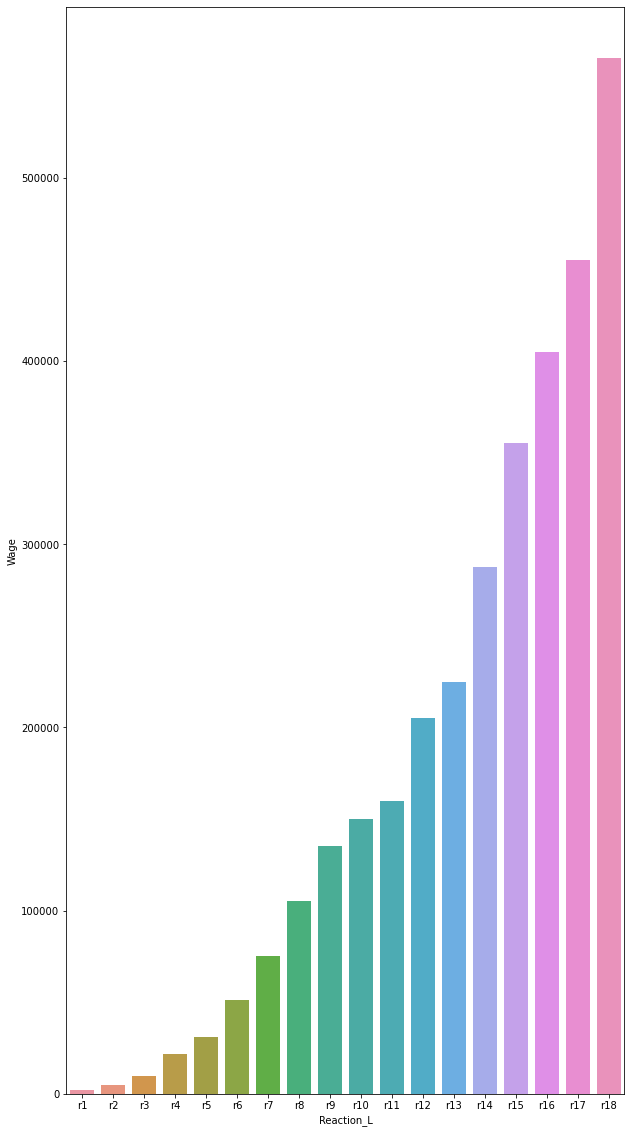

In [300]:
C_Wage = fdf.groupby('Reaction_L')['Wage'].median().reset_index().sort_values('Wage',ascending = True)
C_Wage.round(2)
plt.figure(figsize=(10,20))
sns.barplot(x='Reaction_L',y="Wage",data = C_Wage)

In [312]:
def Reaction_L (x) :
    if 21<= x <= 63 : return '1'
    elif 64<= x <= 67 : return '2'
    elif (68<= x <= 73) : return '3'
    elif 74<= x <= 77 : return '4'
    elif 78<= x <= 79 : return '5'
    elif 80<= x <= 82 : return '6'
    elif 83<= x <= 84 : return '7'
    elif 85 == x  : return '8'
    elif 88 == x  : return '9'
    elif 86 == x  : return '10'
    elif 87 == x  : return '11'
    elif 91 == x  : return '12'
    elif 93 == x  : return '13'
    elif (90 == x)|(x==94)  : return '14'
    elif 89 == x  : return '15'
    elif 96 == x  : return '16'
    elif 92 == x  : return '17'
    elif 95 == x  : return '18'
    
fdf['Reaction_L1'] = fdf.Reactions.apply(Reaction_L).sort_values()

In [297]:
fdf['Reactions'].isnull().sum()

0

In [314]:
fdf['Reaction_L1'] = fdf['Reaction_L1'].astype(int)

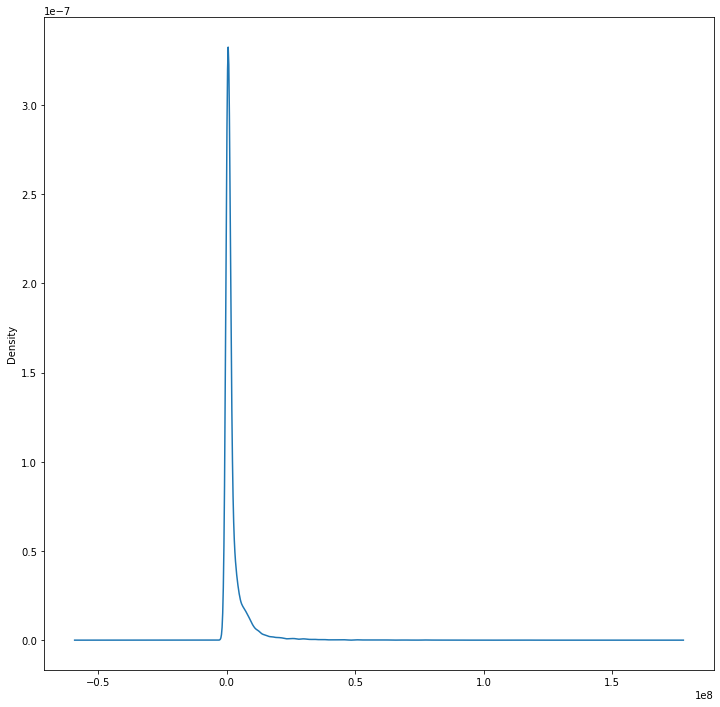

In [131]:
fdf.Value.plot.density()

In [309]:
fdf.corr()

,Age,Overall,Potential,Value,Wage,Skill Moves,Composure,International Reputation,Reactions,Special,Value_L,Value_L1,Age_Group,Age_L,Poten_L,Over_L1,Reaction_L1
Age,1.000000,0.453252,-0.252799,0.077274,0.143944,0.028737,0.393253,0.254064,0.453785,0.238560,0.157556,0.021396,0.858451,0.848592,-0.235773,0.334551,0.323798
Overall,0.453252,1.000000,0.660850,0.631395,0.575940,0.415865,0.730109,0.501142,0.851144,0.608863,0.801737,-0.080943,0.362858,0.480545,0.643786,0.881683,0.746439
Potential,-0.252799,0.660850,1.000000,0.579482,0.488999,0.354908,0.440228,0.374155,0.513877,0.384714,0.673148,-0.130080,-0.250911,-0.233351,0.961649,0.654064,0.534237
Value,0.077274,0.631395,0.579482,1.000000,0.858030,0.317204,0.454276,0.655187,0.544791,0.380310,0.574864,-0.138571,0.065185,0.127207,0.665586,0.854417,0.755706
Wage,0.143944,0.575940,0.488999,0.858030,1.000000,0.264344,0.423256,0.670736,0.499564,0.350178,0.503939,-0.130440,0.129928,0.175470,0.564201,0.784812,0.692562
Skill Moves,0.028737,0.415865,0.354908,0.317204,0.264344,1.000000,0.587385,0.208307,0.378647,0.763206,0.414516,-0.071631,0.022705,0.090371,0.340856,0.364132,0.338958
Composure,0.393253,0.730109,0.440228,0.454276,0.423256,0.587385,1.000000,0.394793,0.688173,0.753364,0.592557,-0.061403,0.331705,0.397724,0.430516,0.639223,0.587941
International Reputation,0.254064,0.501142,0.374155,0.655187,0.670736,0.208307,0.394793,1.000000,0.447417,0.292718,0.404651,-0.106092,0.222630,0.210847,0.415355,0.676202,0.612797
Reactions,0.453785,0.851144,0.513877,0.544791,0.499564,0.378647,0.688173,0.447417,1.000000,0.598932,0.684599,-0.083437,0.372779,0.465780,0.503903,0.762253,0.817090
Special,0.238560,0.608863,0.384714,0.380310,0.350178,0.763206,0.753364,0.292718,0.598932,1.000000,0.516271,-0.026109,0.197586,0.303991,0.369246,0.514047,0.483075


In [150]:
bins = [15,25,35,45]
group_names = [0,1,2]
fdf['Age_Group'] = pd.cut(fdf['Age'], bins, labels = group_names)
fdf.head(10)

,Age,Overall,Potential,Value,Wage,Skill Moves,Composure,International Reputation,Reactions,Special,Value_C,Value_L,Value_L1,Age_Group
0,31,94,94,110500000.0,565000.0,4.0,96.0,5.0,95.0,2202,V_Legend,10.0,1148213.9,1
1,33,94,94,77000000.0,405000.0,5.0,95.0,5.0,96.0,2228,V_Legend,10.0,1148213.9,1
2,26,92,93,118500000.0,290000.0,5.0,94.0,5.0,94.0,2143,V_Legend,10.0,1148213.9,1
3,27,91,93,72000000.0,260000.0,1.0,68.0,4.0,90.0,1471,V_Legend,10.0,1148213.9,1
4,27,91,92,102000000.0,355000.0,4.0,88.0,4.0,91.0,2281,V_Legend,10.0,1148213.9,1
5,27,91,91,93000000.0,340000.0,4.0,91.0,4.0,90.0,2142,V_Legend,10.0,1148213.9,1
6,32,91,91,67000000.0,420000.0,4.0,84.0,4.0,90.0,2280,V_Legend,10.0,1148213.9,1
7,31,91,91,80000000.0,455000.0,3.0,85.0,5.0,92.0,2346,V_Legend,10.0,1148213.9,1
8,32,91,91,51000000.0,380000.0,3.0,82.0,4.0,85.0,2201,V_Legend,10.0,1148213.9,1
9,25,90,93,68000000.0,94000.0,1.0,70.0,3.0,86.0,1331,V_Legend,10.0,1148213.9,0


In [153]:
fdf['Age_Group'] = fdf.Age_Group.astype('float')

In [315]:
fdf.corr()

,Age,Overall,Potential,Value,Wage,Skill Moves,Composure,International Reputation,Reactions,Special,Value_L,Value_L1,Age_Group,Age_L,Poten_L,Over_L1,Reaction_L1
Age,1.000000,0.453252,-0.252799,0.077274,0.143944,0.028737,0.393253,0.254064,0.453785,0.238560,0.157556,0.021396,0.858451,0.848592,-0.235773,0.334551,0.323798
Overall,0.453252,1.000000,0.660850,0.631395,0.575940,0.415865,0.730109,0.501142,0.851144,0.608863,0.801737,-0.080943,0.362858,0.480545,0.643786,0.881683,0.746439
Potential,-0.252799,0.660850,1.000000,0.579482,0.488999,0.354908,0.440228,0.374155,0.513877,0.384714,0.673148,-0.130080,-0.250911,-0.233351,0.961649,0.654064,0.534237
Value,0.077274,0.631395,0.579482,1.000000,0.858030,0.317204,0.454276,0.655187,0.544791,0.380310,0.574864,-0.138571,0.065185,0.127207,0.665586,0.854417,0.755706
Wage,0.143944,0.575940,0.488999,0.858030,1.000000,0.264344,0.423256,0.670736,0.499564,0.350178,0.503939,-0.130440,0.129928,0.175470,0.564201,0.784812,0.692562
Skill Moves,0.028737,0.415865,0.354908,0.317204,0.264344,1.000000,0.587385,0.208307,0.378647,0.763206,0.414516,-0.071631,0.022705,0.090371,0.340856,0.364132,0.338958
Composure,0.393253,0.730109,0.440228,0.454276,0.423256,0.587385,1.000000,0.394793,0.688173,0.753364,0.592557,-0.061403,0.331705,0.397724,0.430516,0.639223,0.587941
International Reputation,0.254064,0.501142,0.374155,0.655187,0.670736,0.208307,0.394793,1.000000,0.447417,0.292718,0.404651,-0.106092,0.222630,0.210847,0.415355,0.676202,0.612797
Reactions,0.453785,0.851144,0.513877,0.544791,0.499564,0.378647,0.688173,0.447417,1.000000,0.598932,0.684599,-0.083437,0.372779,0.465780,0.503903,0.762253,0.817090
Special,0.238560,0.608863,0.384714,0.380310,0.350178,0.763206,0.753364,0.292718,0.598932,1.000000,0.516271,-0.026109,0.197586,0.303991,0.369246,0.514047,0.483075


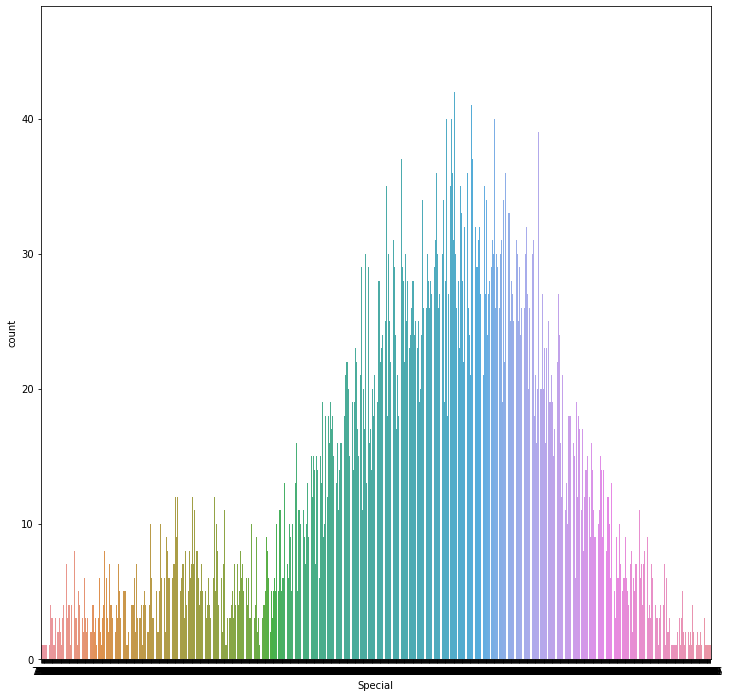

In [455]:
sns.countplot('Special',data = fdf)

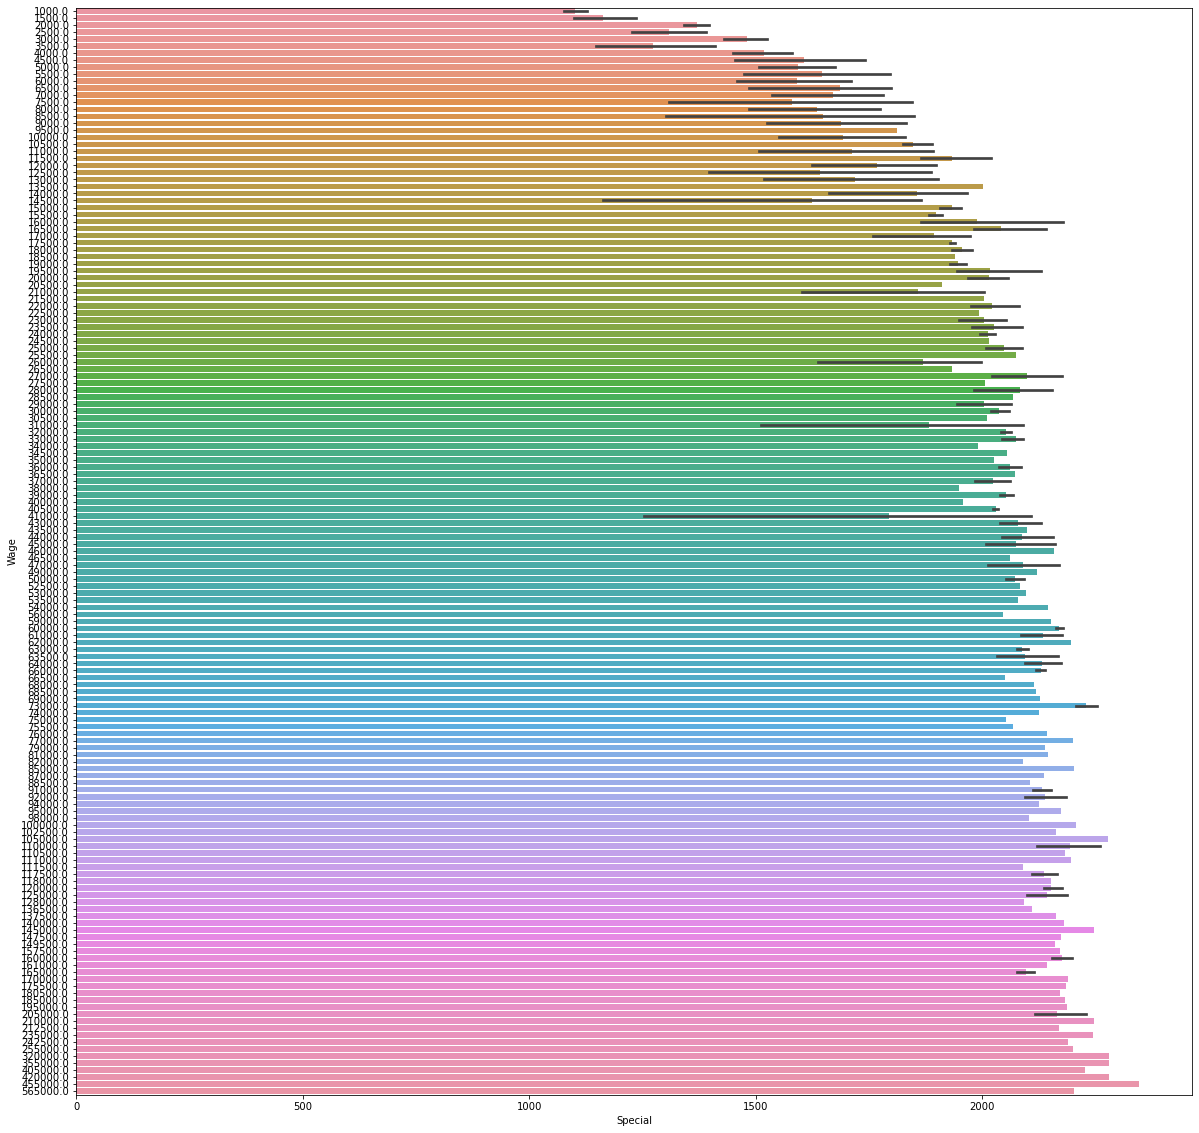

In [461]:
C_Wage = fdf.groupby('Special')['Wage'].median().reset_index().sort_values('Wage',ascending = True)
C_Wage.round(2)
plt.figure(figsize=(20,20))
sns.barplot(x='Special',y="Wage",data = C_Wage, orient='h')

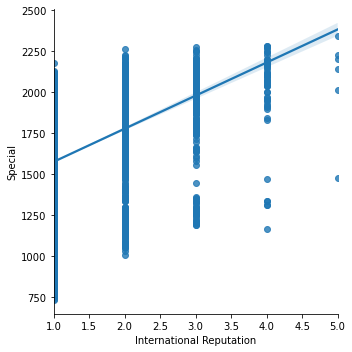

In [425]:
sns.lmplot(x='International Reputation', y='Special', data= fdf )

In [433]:
def Special_L (x) :
    if 500 < x : return 's1'
    elif 500 <= x < 1000 : return 's2'
    elif 1000 <= x < 1500 : return 's3'
    elif 1500 <= x <= 2000 : return 's4'
    elif 2000 < x  : return 's5'
   
    
fdf['Special_L'] = fdf.Reactions.apply(Special_L)


In [452]:
# 스페셜 구분 ( 스페셜값에서 2000을 기준으로 슈퍼스페셜과 아닌것구분 )
# 2000으로 나눈 이유는 2000부터 Wage가 크게 차이가나기 때문
def Special_L2 (x):
    if x < 2000 : return 'Not_SS'
    elif 2000 <= x  : return 'SS'
   
    
fdf['Special_L2'] = fdf.Special.apply(Special_L2)
fdf['Special_L2']

0            SS
1            SS
2            SS
3        Not_SS
4            SS
          ...  
17913    Not_SS
17914    Not_SS
17915    Not_SS
17916    Not_SS
17917    Not_SS
Name: Special_L2, Length: 17918, dtype: object